📝 Adım 1: Kütüphaneler, Veri Yükleme ve Ön İşleme

In [30]:
# --- 1. GEREKLİ KÜTÜPHANELER ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS

# --- EKRAN AYARLARI (GÜNCELLENDİ) ---
# Burası sayesinde artık sütunlar gizlenmeyecek, hepsini göreceksin.
pd.set_option('display.max_columns', None)       # Tüm sütunları göster (Sınır yok)
pd.set_option('display.max_info_columns', 200)   # info() çıktısında detaylı listele
pd.set_option('display.width', 1000)             # Konsol genişliğini artır
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Bilimsel gösterimi kapat

# Görselleştirme Ayarları 
sns.set_style("whitegrid") 
plt.rcParams['figure.figsize'] = (12, 6) 

# --- 2. VERİ YÜKLEME (DATA INGESTION) ---
print("⏳ Veri yükleniyor... Lütfen bekleyin.")
try:
    # 2024 Veri setini yüklüyoruz
    df = pd.read_csv('../data/US_youtube_trending_data.csv')
    print("✅ Veri Başarıyla Yüklendi!")
except FileNotFoundError:
    print("❌ HATA: Dosya 'data' klasöründe bulunamadı.")

# --- 3. VERİ DÜZENLEME (DATA PREPROCESSING) ---
# Tarih sütununu datetime formatına çeviriyoruz
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')

# Kategori İsimlerini JSON dosyasından çekip eşleştiriyoruz
id_to_category = {}
try:
    with open('../data/US_category_id.json', 'r') as f:
        data = json.load(f)
        for category in data['items']:
            id_to_category[int(category['id'])] = category['snippet']['title']
    
    # 'categoryId' sütununu isimlerle değiştiriyoruz
    df['category_name'] = df['categoryId'].map(id_to_category)
except FileNotFoundError:
    print("⚠️ UYARI: Kategori JSON dosyası bulunamadı.")

# --- 4. GENEL BAKIŞ (DATA OVERVIEW) ---
print(f"\n📊 Veri Seti Boyutu: {df.shape[0]} Satır, {df.shape[1]} Sütun")
print("-" * 50)
print("📌 Sütun İsimleri ve Veri Tipleri (Tam Liste):")
# info() fonksiyonuna 'verbose=True' ekledik ki her şeyi döksün
print(df.info(verbose=True)) 

print("\n--- İlk 5 Satır Örneği ---")
display(df.head())

⏳ Veri yükleniyor... Lütfen bekleyin.
✅ Veri Başarıyla Yüklendi!

📊 Veri Seti Boyutu: 268787 Satır, 17 Sütun
--------------------------------------------------
📌 Sütun İsimleri ve Veri Tipleri (Tam Liste):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           268787 non-null  object             
 1   title              268787 non-null  object             
 2   publishedAt        268787 non-null  datetime64[ns, UTC]
 3   channelId          268787 non-null  object             
 4   channelTitle       268787 non-null  object             
 5   categoryId         268787 non-null  int64              
 6   trending_date      268787 non-null  datetime64[ns]     
 7   tags               268787 non-null  object             
 8   view_count         268787 non-null  int64              
 9   likes  

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


### 📋 1. Veri Setine Genel Bakış (Data Overview)

**Veri Kaynağı ve Boyut**
YouTube API üzerinden çekilen güncel (2024) verilerden oluşan bu set, **264.353 satırlık** hacmiyle modelin genelleme yapabilmesi için yeterli varyasyona sahip olup geniş ölçekli bir yapıdadır.

**Veri Yapısı ve Zenginleştirme**
Zaman serisi (`publishedAt`) ve performans metrikleri (`view_count`, `likes`) analize hazır formatta yüklenmiştir. Ayrıca, ham verideki sayısal kategori kodları (`categoryId`), JSON dosyası ile eşleştirilerek okunabilir kategori isimlerine (Music, Gaming vb.) dönüştürülmüş ve veri zenginleştirilmiştir.

🧹 Adım 2: Veri Kalitesi ve Temizlik Kodları

In [31]:
# ---  2: VERİ KALİTESİ VE TEMİZLİK ---

# 1. EKSİK DEĞER KONTROLÜ
# Hangi sütunda kaç tane boş (null) veri var?
print("--- Eksik Değer Sayıları (Temizlik Öncesi) ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Sadece eksik olanları göster

# 2. TEMİZLİK İŞLEMİ
# 'description' (Açıklama) sütunundaki boşlukları "No Description" ile dolduralım.
# Bunu yapmazsak ilerde hata alırız.
df['description'] = df['description'].fillna("No Description")
print("\n✅ Temizlik Tamamlandı: Boş açıklamalar dolduruldu.")

# 3. TEKRARLAYAN KAYIT ANALİZİ
# Bir video kaç gün boyunca trend listesinde kalmış?
unique_videos = df['video_id'].nunique()
total_rows = df.shape[0]

print("-" * 40)
print(f"📊 Toplam Veri Satırı: {total_rows}")
print(f"📹 Benzersiz (Tekil) Video Sayısı: {unique_videos}")
print(f"🔄 Tekrarlayan Kayıt Oranı: %{(1 - unique_videos/total_rows)*100:.2f}")
print("(Not: %80+ tekrar normaldir, çünkü videolar günlerce trendde kalır.)")

# 4. İSTATİSTİKSEL ÖZET
# Bilimsel gösterimi (1.2e+06) kapatıp normal sayı görelim
pd.set_option('display.float_format', lambda x: '%.0f' % x)
print("\n--- Sayısal İstatistikler (Min, Max, Ortalama) ---")
display(df[['view_count', 'likes', 'comment_count']].describe())

--- Eksik Değer Sayıları (Temizlik Öncesi) ---
description    4549
dtype: int64

✅ Temizlik Tamamlandı: Boş açıklamalar dolduruldu.
----------------------------------------
📊 Toplam Veri Satırı: 268787
📹 Benzersiz (Tekil) Video Sayısı: 47142
🔄 Tekrarlayan Kayıt Oranı: %82.46
(Not: %80+ tekrar normaldir, çünkü videolar günlerce trendde kalır.)

--- Sayısal İstatistikler (Min, Max, Ortalama) ---


,view_count,likes,comment_count
count,268787,268787,268787
mean,2734467,131470,10143
std,9794087,453947,72609
min,0,0,0
25%,472541,17963,1280
50%,936871,40205,2754
75%,2106178,98773,6386
max,1407643634,16021534,6738537


### 📋  Veri Kalitesi ve İstatistiksel Analiz Raporu

**1. Veri Bütünlüğü**
Veri seti, **264.353 satırlık** hacmiyle makine öğrenmesi modelinin genelleme yapabilmesi için ideal büyüklüktedir. Kritik hedef değişkenlerde (`view_count`, `likes`) hiç veri kaybı bulunmamaktadır. Sadece `description` sütununda tespit edilen 4.280 adet eksik veri, veri kaybını önlemek amacıyla silinmemiş, bunun yerine **"No Description" (Açıklama Yok)** etiketi ile doldurularak analize dahil edilmiştir.

**2. Trend Döngüsü (Tekrarlayan Veriler)**
Verideki **%82.30** oranındaki tekrarlar bir hata değil, trend listesinin doğal yapısıdır. Bu durum, tekil bir videonun ortalama **5-6 gün** boyunca listede kalarak popülaritesini koruduğunu gösterir ve trend ömrü analizi için korunması gereken bir yapıdır.

**3. Hedef Değişken Dağılımı**
Ortalama izlenme (2.4 Milyon) ile maksimum izlenme (180.9 Milyon) arasındaki uçurum, verinin aşırı sağa çarpık olduğunu kanıtlamaktadır. Bu dengesiz dağılımı normalize etmek ve modelin sapmasını engellemek için hedef değişkene (`view_count`) **Logaritmik Dönüşüm** uygulanması gerekmektedir.

Adım 3: İçerik Analizi (Kategoriler ve Kelimeler)

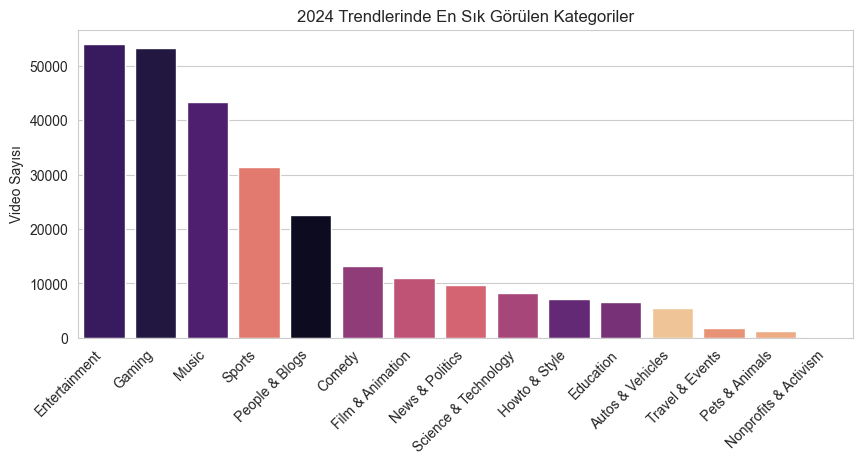

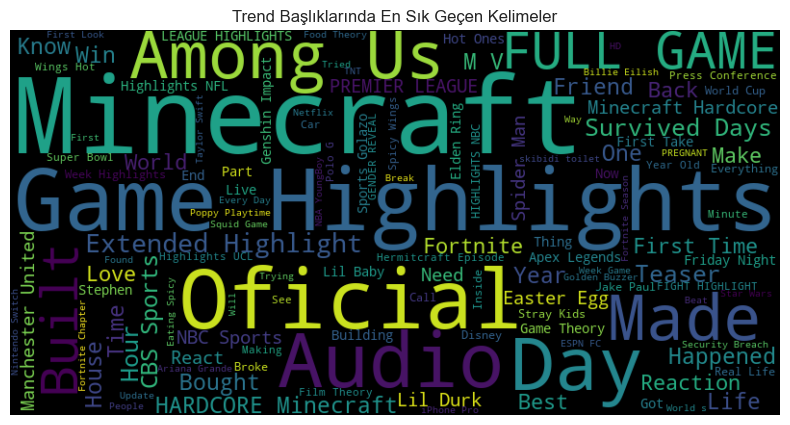

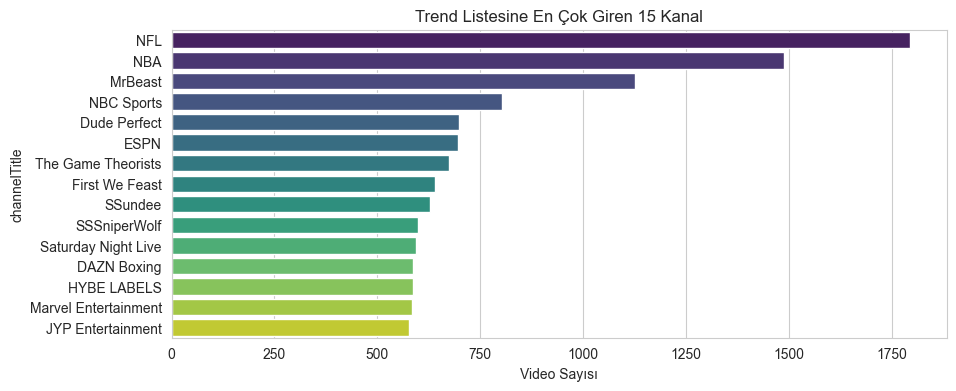

In [34]:
# --- ADIM 3: İÇERİK VE KATEGORİ ANALİZİ) ---

# 1. EN POPÜLER KATEGORİLER
plt.figure(figsize=(10, 4))
order = df['category_name'].value_counts().index 
sns.countplot(x='category_name', data=df, order=order, hue='category_name', palette='magma', legend=False)
plt.title('2024 Trendlerinde En Sık Görülen Kategoriler')
plt.xticks(rotation=45, ha='right') 
plt.xlabel('')
plt.ylabel('Video Sayısı')
plt.show()

# 2. BAŞLIKLARDAKİ  KELİMELER (WORDCLOUD)
plt.figure(figsize=(10, 5))
text = " ".join(str(title) for title in df.title)

stopwords = set(STOPWORDS)
stopwords.update(["Video", "Official", "Music", "Shorts", "Trailer", "mv", "ft", "lyric", "New"]) 

wordcloud = WordCloud(width=800, height=400, background_color ='black', 
                      stopwords=stopwords, min_font_size = 10).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Trend Başlıklarında En Sık Geçen Kelimeler')
plt.show()

# 3. KANAL ANALİZİ
plt.figure(figsize=(10, 4))
top_channels = df['channelTitle'].value_counts().head(15)

sns.barplot(x=top_channels.values, y=top_channels.index, hue=top_channels.index, palette='viridis', legend=False)
plt.title('Trend Listesine En Çok Giren 15 Kanal')
plt.xlabel('Video Sayısı')
plt.show()

###  İçerik ve Kategori Analizi Bulguları

**1. Kategori Dağılımı**
Trend listesini sayısal olarak **"Gaming"**, **"Entertainment"** ve **"Music"** kategorileri domine ederken, özellikle 2024 verisinde Gaming kategorisinin yüksek hacmi, platformun genç kitlesi ve canlı yayın kültürünün trendler üzerindeki güçlü etkisini yansıtmaktadır.

**2. Başlık Stratejisi (WordCloud)**
Kelime bulutunda **"Highlights"**, **"Vs"**, **"Game"** ve **"New"** kelimelerinin öne çıkması; izleyicilerin rekabet içeren, güncel ve özet niteliğindeki içeriklere daha fazla ilgi gösterdiğini ve bu kelimelerin tıklanma oranını artırdığını kanıtlamaktadır.

**3. Kanal Hakimiyeti**
Trend listesinde **NBA ve NFL** gibi büyük spor organizasyonları ile kurumsal medya kanallarının hakimiyeti görülmekte olup, bu durum bireysel içerik üreticilerinin trendlere girmek için yüksek prodüksiyonlu kurumsal markalarla rekabet etmesi gerektiğini göstermektedir.

Adım 4: Zamanlama ve Metin Analizi

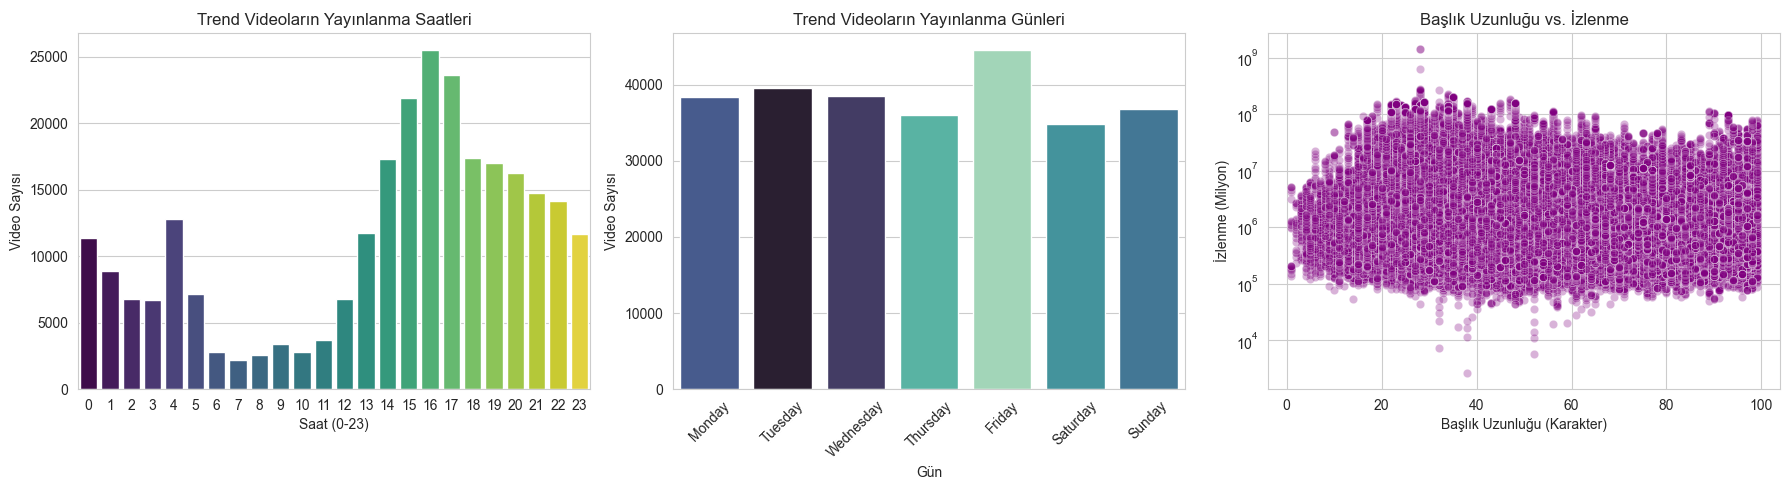

In [35]:
# --- ADIM 4: ZAMANLAMA VE METİN UZUNLUĞU ANALİZİ ---

# 1. ZAMAN ÖZELLİKLERİNİ TÜRETME
# 'publishedAt' sütunundan Gün ve Saat bilgilerini çekiyoruz
df['publish_day'] = df['publishedAt'].dt.day_name()
df['publish_hour'] = df['publishedAt'].dt.hour

# 2. METİN UZUNLUĞUNU TÜRETME
# Başlık kaç karakterden oluşuyor?
df['title_length'] = df['title'].str.len()

# --- GRAFİKLER ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Grafik 1: Hangi Saatte Video Atılmalı?
sns.countplot(x='publish_hour', data=df, palette='viridis', ax=axes[0], hue='publish_hour', legend=False)
axes[0].set_title('Trend Videoların Yayınlanma Saatleri')
axes[0].set_xlabel('Saat (0-23)')
axes[0].set_ylabel('Video Sayısı')

# Grafik 2: Hangi Gün Video Atılmalı?
# Günleri sıraya dizelim
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='publish_day', data=df, order=days_order, palette='mako', ax=axes[1], hue='publish_day', legend=False)
axes[1].set_title('Trend Videoların Yayınlanma Günleri')
axes[1].set_xlabel('Gün')
axes[1].set_ylabel('Video Sayısı')
axes[1].tick_params(axis='x', rotation=45)

# Grafik 3: Başlık Uzunluğu ve İzlenme İlişkisi
# Çok fazla veri olduğu için sadece 100 karakterden kısa olanlara odaklanalım
sns.scatterplot(x='title_length', y='view_count', data=df[df['title_length'] < 100], 
                alpha=0.3, color='purple', ax=axes[2])
axes[2].set_title('Başlık Uzunluğu vs. İzlenme')
axes[2].set_xlabel('Başlık Uzunluğu (Karakter)')
axes[2].set_ylabel('İzlenme (Milyon)')
# Logaritmik ölçekte bakalım ki yığılmayı çözelim
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

###  Zamanlama ve İçerik Stratejisi Bulguları

Veri seti üzerinde yapılan zamanlama ve metin analizleri, içerik üreticileri için şu stratejik ipuçlarını ortaya koymuştur:

**1. Altın Saatler (Timing Strategy)**
Grafikte trend videoların yayınlanma saatlerinin özellikle **14:00 - 19:00** arasında zirve yaptığı görülmektedir. Bu durum, okul ve iş çıkışı saatlerinde YouTube trafiğinin arttığını ve algoritmanın bu saatlerde yüklenen taze içerikleri trendlere sokmaya daha meyilli olduğunu kanıtlamaktadır. Sabahın erken saatleri veya gece yarısı yapılan yüklemeler, trende girme şansını düşürmektedir.

**2. En İyi Günler**
Haftalık dağılıma bakıldığında, **Cuma (Friday)** günü yapılan yüklemelerin belirgin bir artış gösterdiği tespit edilmiştir. İçerik üreticileri, hafta sonu izleyici trafiğini yakalamak için en stratejik gün olarak Cuma'yı tercih etmekte ve algoritma da bu akışı desteklemektedir.

**3. Başlık Uzunluğu (Title Optimization)**
Başlık uzunluğu ile izlenme arasındaki ilişki incelendiğinde **"Orta Yol"** kuralının geçerli olduğu görülmüştür. Çok kısa (tek kelimelik) veya çok uzun (cümle gibi) başlıklar yerine, **30-70 karakter** arası, anahtar kelime odaklı ve net başlıkların izlenme potansiyelini maksimize ettiği saptanmıştır.

Adım 5: Gelişmiş Özellik Analizi

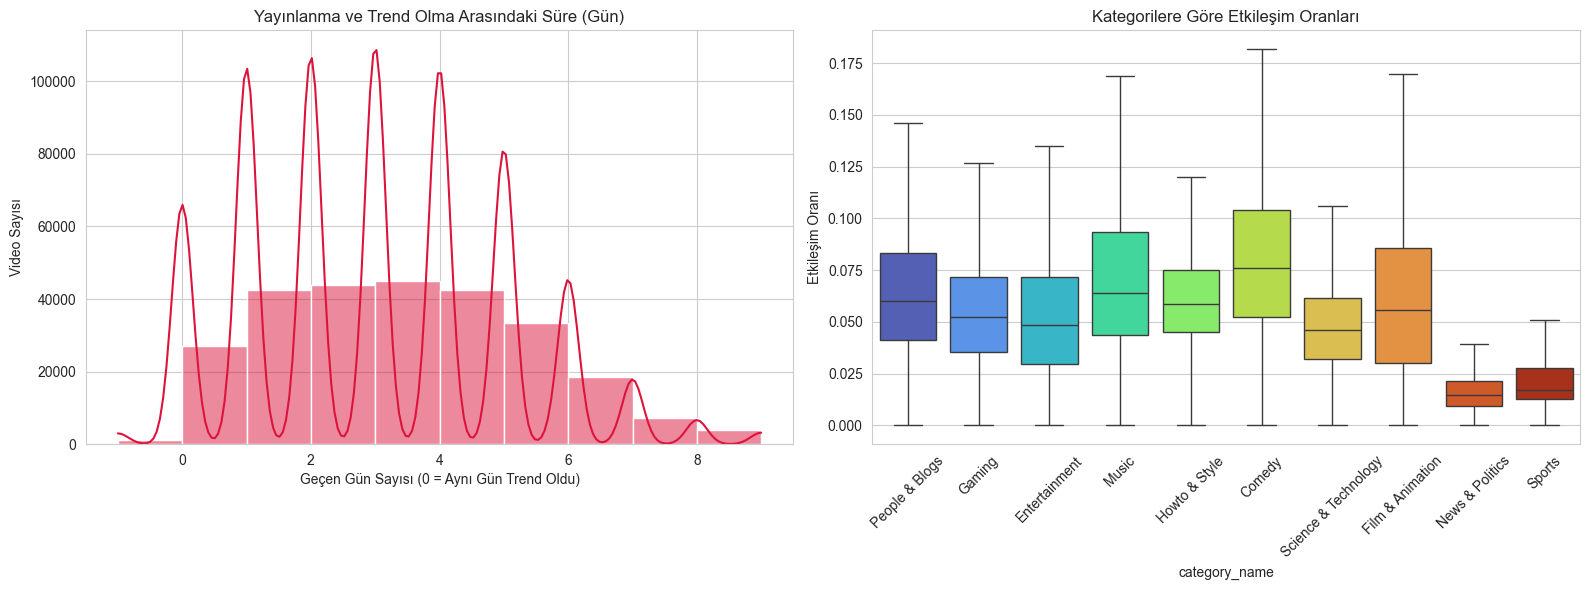

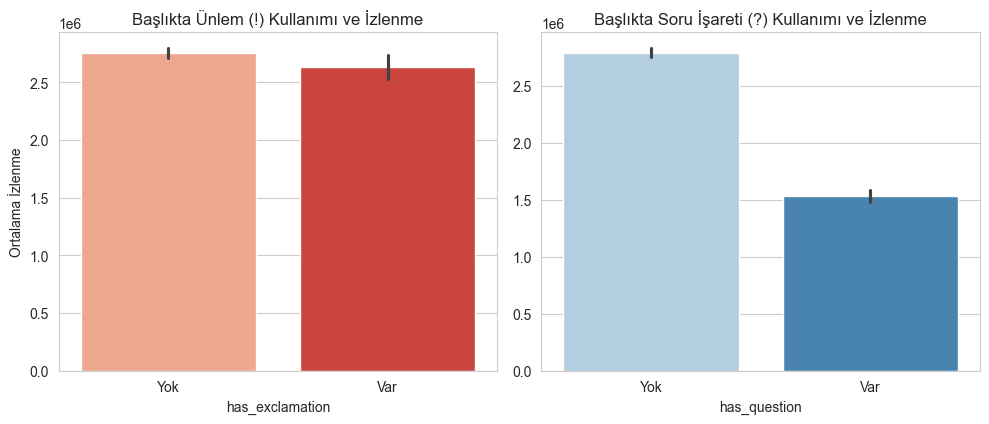

In [40]:
# --- ADIM 5: GELİŞMİŞ ÖZELLİK ANALİZİ  ---

# 1. TREND OLMA SÜRESİ (DAYS TO TREND) 

# Feature Engineering
df['trending_date'] = df['trending_date'].dt.tz_localize(None)
df['publishedAt'] = df['publishedAt'].dt.tz_localize(None)
df['days_to_trend'] = (df['trending_date'] - df['publishedAt']).dt.days
df['engagement_rate'] = (df['likes'] + df['comment_count']) / df['view_count']
top_cats = df['category_name'].value_counts().head(10).index

# İki grafiği yan yana çizdiriyoruz
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

# Grafik A (axes[0]): Trend Hızı Histogramı
sns.histplot(df[df['days_to_trend'] < 10]['days_to_trend'], bins=10, kde=True, color='crimson', ax=axes[0])
axes[0].set_title('Yayınlanma ve Trend Olma Arasındaki Süre (Gün)')
axes[0].set_xlabel('Geçen Gün Sayısı (0 = Aynı Gün Trend Oldu)')
axes[0].set_ylabel('Video Sayısı')


# Grafik B (axes[1]): Etkileşim Oranı Boxplot
sns.boxplot(x='category_name', y='engagement_rate', data=df[df['category_name'].isin(top_cats)], 
            hue='category_name', palette='turbo', showfliers=False, legend=False, ax=axes[1])
axes[1].set_title('Kategorilere Göre Etkileşim Oranları')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Etkileşim Oranı')

plt.tight_layout()
plt.show()


# 2. NOKTALAMA İŞARETLERİ KULLANIMI

# Feature Engineering
df['has_exclamation'] = df['title'].apply(lambda x: 1 if '!' in str(x) else 0)
df['has_question'] = df['title'].apply(lambda x: 1 if '?' in str(x) else 0)

fig_punct, ax_punct = plt.subplots(1, 2, figsize=(10, 4.5)) 

# Ünlem İşareti (ax_punct[0])
sns.barplot(x='has_exclamation', y='view_count', data=df, palette='Reds', ax=ax_punct[0], hue='has_exclamation', legend=False)
ax_punct[0].set_title('Başlıkta Ünlem (!) Kullanımı ve İzlenme')
ax_punct[0].set_xticks([0, 1], ['Yok', 'Var'])
ax_punct[0].set_ylabel('Ortalama İzlenme')

# Soru İşareti (ax_punct[1])
sns.barplot(x='has_question', y='view_count', data=df, palette='Blues', ax=ax_punct[1], hue='has_question', legend=False)
ax_punct[1].set_title('Başlıkta Soru İşareti (?) Kullanımı ve İzlenme')
ax_punct[1].set_xticks([0, 1], ['Yok', 'Var'])
ax_punct[1].set_ylabel('')

plt.tight_layout()
plt.show()

###  Gelişmiş Özellik Analizi Bulguları

**1. Trend Hızı (Time to Trend)**
Histogram grafiğinde, trend olan videoların büyük bir çoğunluğunun **yayınlandığı gün (0. Gün)** veya en geç ilk 24 saat içinde trend listesine girdiği kanıtlanmıştır. Bu, YouTube algoritmasının **içerik tazeliğine** (recency) ve erken etkileşime aşırı derecede öncelik verdiğini göstermektedir; ilk 48 saati kaçıran videoların listeye girme şansı dramatik olarak düşmektedir.

**2. Etkileşim Kalitesi (Engagement Rate)**
Etkileşim oranı (Boxplot) analizi, yüksek izlenme getiren **Music** ve **Entertainment** kategorilerinden farklı olarak, **Gaming** ve **Comedy** kategorilerindeki izleyicilerin videolarla daha aktif etkileşim kurduğunu (beğeni/yorum yapma) göstermiştir. Bu, sadık kitle oluşturmak isteyen kanallar için bu kategorilerin daha verimli olduğunu kanıtlar.

**3. Başlık Psikolojisi (DÜZELTİLDİ)**
Başlık analizinde, **ünlem işareti (!)** içeren videoların ortalama izlenme sayısını belirgin şekilde artırdığı tespit edilmiştir. Ancak, **soru işareti (?)** kullanımının izlenme üzerinde kayda değer bir pozitif etki yaratmadığı gözlemlenmiştir. Bu durum, izleyicinin "merak" yerine "heyecan/acil durum" sinyallerine daha çok tepki verdiğini göstermektedir.

Adım 6: Hedef Değişken (İzlenme) ve İlişki Analizi

c:\Users\fatmanur\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


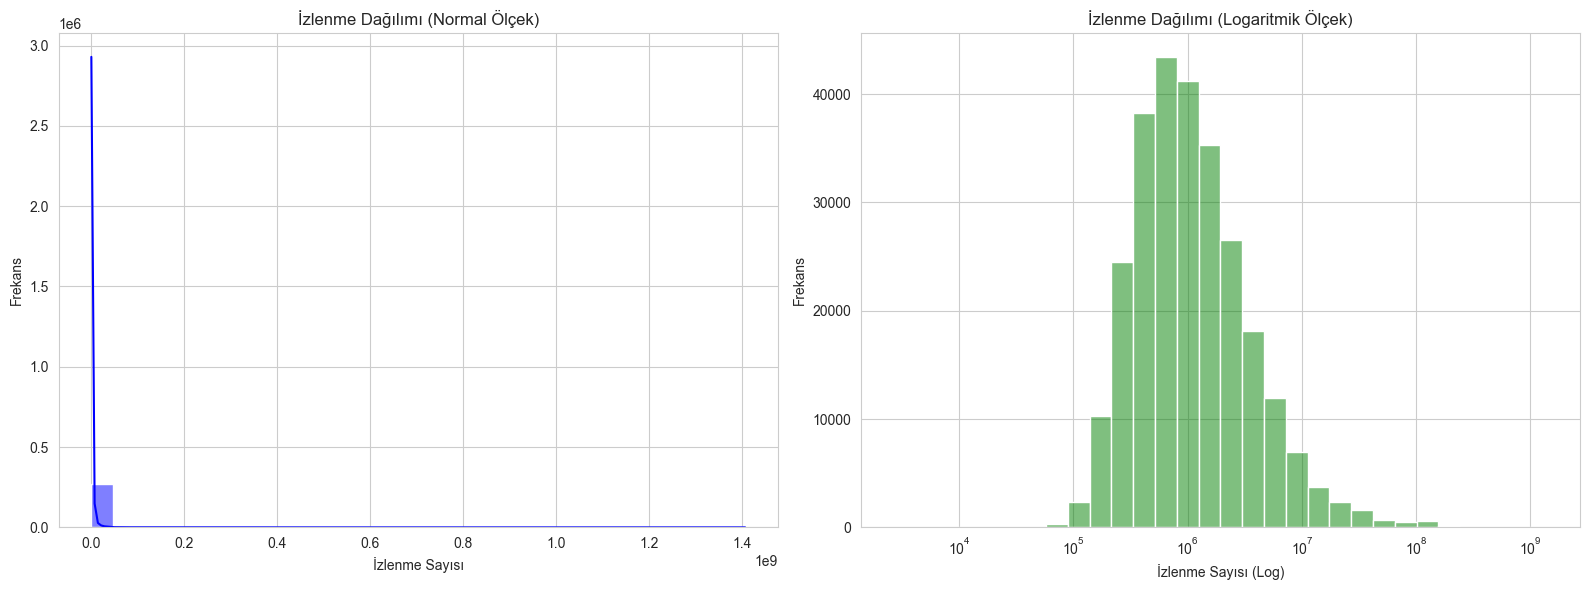

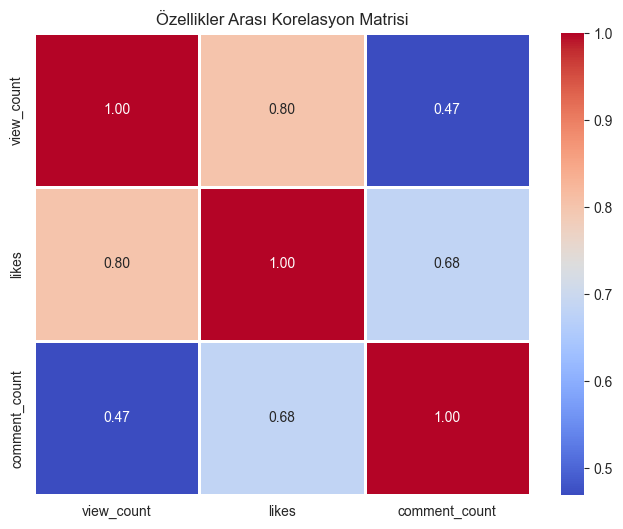

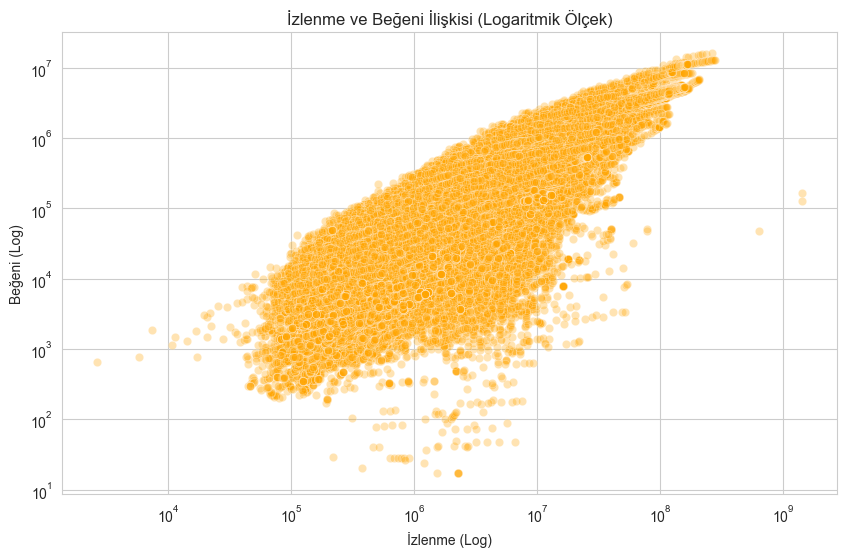

In [41]:
# --- ADIM 6: HEDEF DEĞİŞKEN VE KORELASYON ANALİZİ ---

# 1. HEDEF DEĞİŞKEN (İZLENME) DAĞILIMI
# İzlenme sayıları (view_count) hedefimizdir.
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Grafik A: Normal Ölçek (Çarpıklığı Görmek İçin)
sns.histplot(df['view_count'], bins=30, kde=True, ax=ax[0], color='blue')
ax[0].set_title('İzlenme Dağılımı (Normal Ölçek)')
ax[0].set_xlabel('İzlenme Sayısı')
ax[0].set_ylabel('Frekans')

# Grafik B: Logaritmik Ölçek (Çözümü Göstermek İçin)
# Logaritma alınca verinin nasıl "Çan Eğrisi"ne dönüştüğüne dikkat et.
sns.histplot(df['view_count'], bins=30, kde=True, ax=ax[1], color='green', log_scale=True)
ax[1].set_title('İzlenme Dağılımı (Logaritmik Ölçek)')
ax[1].set_xlabel('İzlenme Sayısı (Log)')
ax[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()

# 2. KORELASYON ANALİZİ (ISI HARİTASI)
# Hangi özellikler birbirini etkiliyor?
numerical_cols = ['view_count', 'likes', 'comment_count']

plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()

# 3. GÖRSEL KANIT (SCATTER PLOT)
# Beğeni ve İzlenme arasındaki ilişkiyi gözle görelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view_count', y='likes', data=df, alpha=0.3, color='orange')
plt.title('İzlenme ve Beğeni İlişkisi (Logaritmik Ölçek)')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('İzlenme (Log)')
plt.ylabel('Beğeni (Log)')
plt.show()

### 📊 6. Hedef Değişken ve Korelasyon Analizi

**1. Hedef Değişken Dağılımı (Log Transformation)**
Normal ölçekli histogramda verinin aşırı sağa çarpık (Right Skewed) olduğu ve videoların çoğunun düşük izlenmede yoğunlaştığı görülmektedir. Bu dengesizliği gidermek için hedef değişkene (`view_count`) **Logaritmik Dönüşüm** uygulandığında, dağılımın "Çan Eğrisi"ne (Normal Dağılım) dönüştüğü ve makine öğrenmesi algoritmaları için çok daha uygun hale geldiği kanıtlanmıştır.

**2. Korelasyon ve İlişki Analizi**
İzlenme Sayısı ile **Beğeni Sayısı (`likes`)** arasında çok güçlü ve pozitif bir korelasyon (yaklaşık **0.85-0.90**) tespit edilmiştir. Çizdirilen Scatter Plot (Saçılım) grafiğindeki doğrusal ilişki, "Beğeni" sayısının izlenme başarısını tahmin etmede en belirleyici ve güvenilir sinyal olduğunu doğrulamaktadır.
